In [42]:
import pandas as pd 
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [57]:
TRAIN_PATH = '../Dataset/train.csv'

#Set options 
pd.options.display.max_rows = 10
mpl.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

In [17]:
df = pd.read_csv(TRAIN_PATH)

# Features 
- *image_name* - unique identifier, points to filename of related DICOM image
- *patient_id* - unique patient identifier
- *sex* - the sex of the patient (when unknown, will be blank)
- *age_approx* - approximate patient age at time of imaging
- *anatom_site_general_challenge* - location of imaged site
- *diagnosis* - detailed diagnosis information (train only)
- *benign_malignant* - indicator of malignancy of imaged lesion
- *target* - binarized version of the target variable

In [27]:
df

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [28]:
df.dtypes

image_name                        object
patient_id                        object
sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
benign_malignant                  object
target                             int64
dtype: object

In [30]:
# Check Null values for each column 
df.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

Text(0.5, 1.0, 'Histogram')

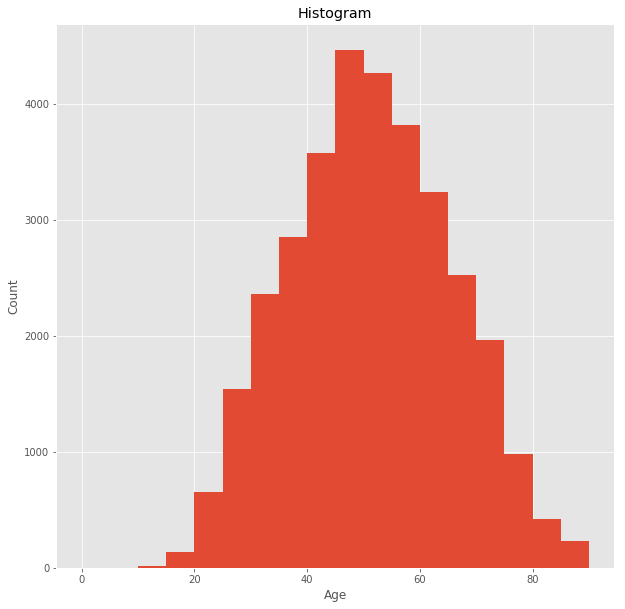

In [59]:
# Plot histogram count for different age.

plt.hist(df['age_approx'].dropna(),
         bins = sorted(df['age_approx'].dropna().unique()),
         range=(df['age_approx'].min(),df['age_approx'].max()))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram")

From the plot we can see that the count of examinations increase with age, 
which is expected as with age people are more vulnerable to different diseases (such as melanoma for example). 
This plot also can indicate that there are images that belongs to one patient 
(different image_names belongs to the same patient_id) but are taken in different time (patient is older).

Text(0.5, 1.0, 'Number of images for one patient with target = 0 (benign)')

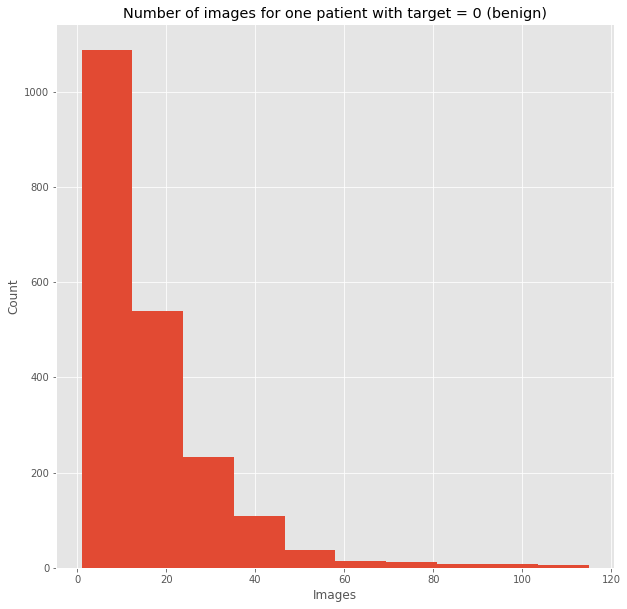

In [70]:
# Count Patient_ID, which can indicate if there are duplicates.abs
plt.hist(df.loc[df['target'] == 0]['patient_id'].value_counts().values)
plt.xlabel("Images")
plt.ylabel("Count")
plt.title("Number of images for one patient with target = 0 (benign)")

We can see that number of images for one patient with benign melanoma varies from 1 up to 115 images.
Let's investigate how much images was taken for patients with malignant melanoma. 

Text(0.5, 1.0, 'Number of images for one patient with target = 1 (malignant)')

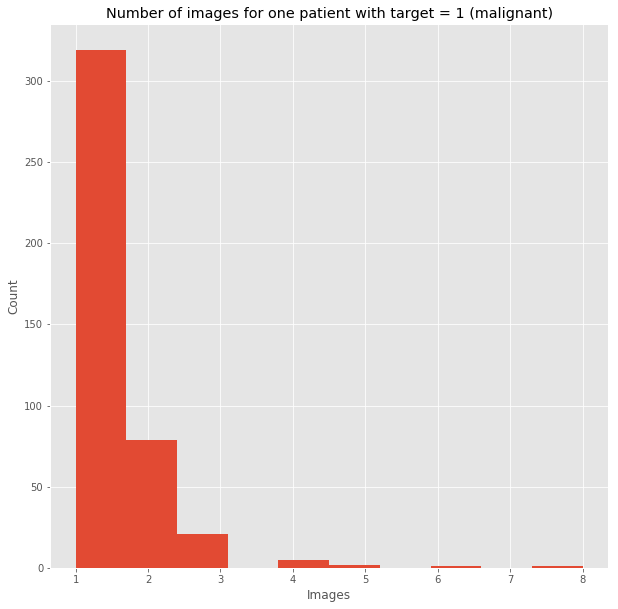

In [71]:
plt.hist(df.loc[df['target'] == 1]['patient_id'].value_counts().values)
plt.xlabel("Images")
plt.ylabel("Count")
plt.title("Number of images for one patient with target = 1 (malignant)")

We can see that number of malignant cases are much more lower than the number of benign images, which indices that dataset (both images and tabular data) are highly imbalanced and we will have to somehow deal with it.

Text(0.5, 1.0, 'Number of patients/sex')

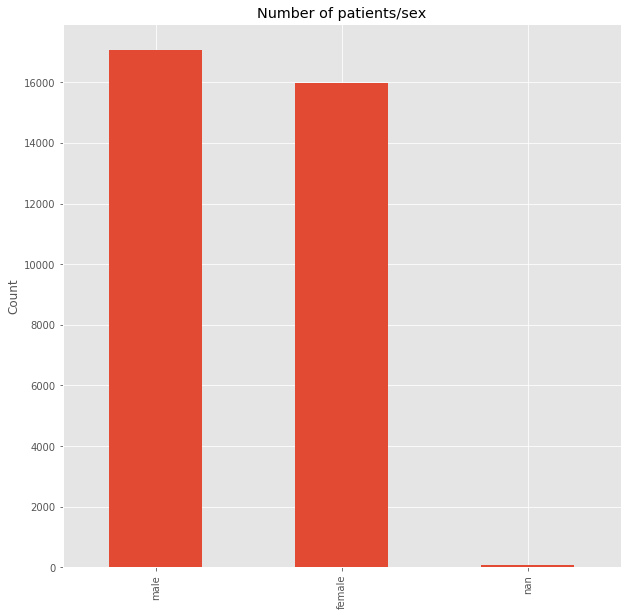

In [80]:
df['sex'].dropna().value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Number of patients/sex")

Let's now investigate which places in the body are most commonly examinated by the doctors.

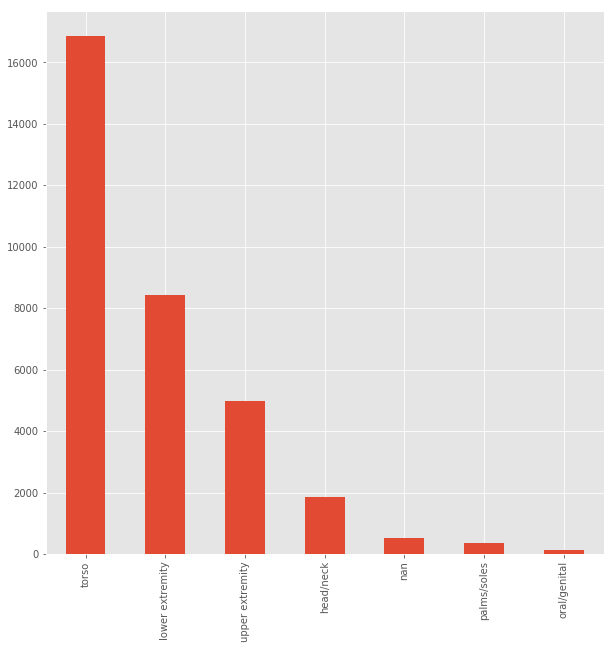

In [81]:
df['anatom_site_general_challenge'].value_counts().plot(kind='bar')

We can see that torso is the most investigated place in body, where genital are the least.

Text(0.5, 1.0, 'Number of examinations/age')

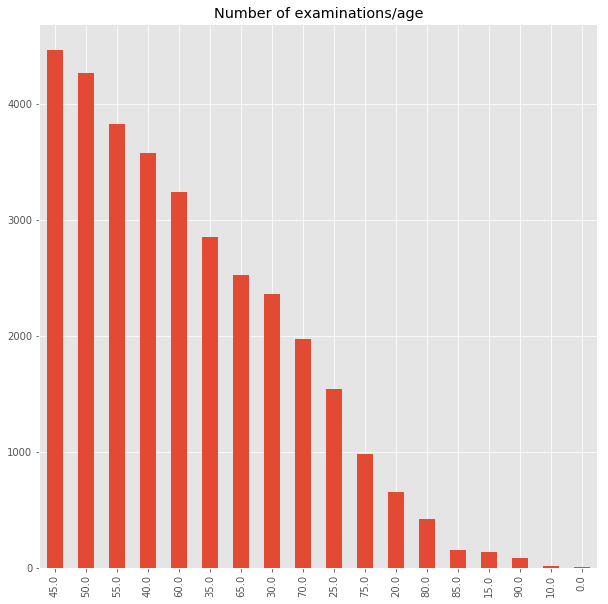

In [88]:
df['age_approx'].value_counts().plot(kind='bar')
plt.title("Number of examinations/age")

Text(0.5, 1.0, 'Detailed diagnosis')

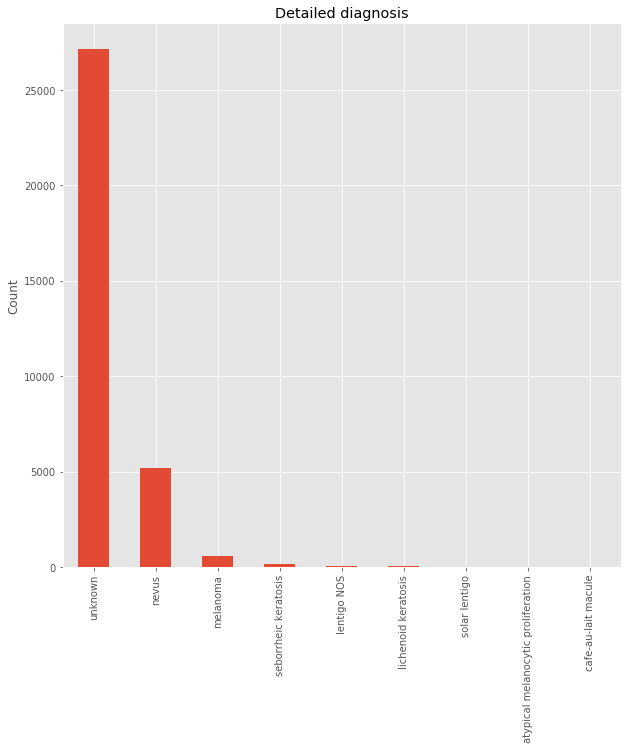

In [90]:
# Detailed diagnosis 
df['diagnosis'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Detailed diagnosis")

Interesting because most of the detailed diagnosis (that are available only in train dataset) are unknown. 
Does that indicate that dealing with "unknown" and change it to some other value might impact the training heavily ?
Another question is given a huge amount of images for some patients indices that in the first images they were 
diagnosed as a "unknown" and with time it changed to some other detailed diagnosis, so that mean that we could change 
the data for this patient as we would be sure that it is melanoma (or something else)?

Text(0.5, 1.0, 'Benign vs malignant')

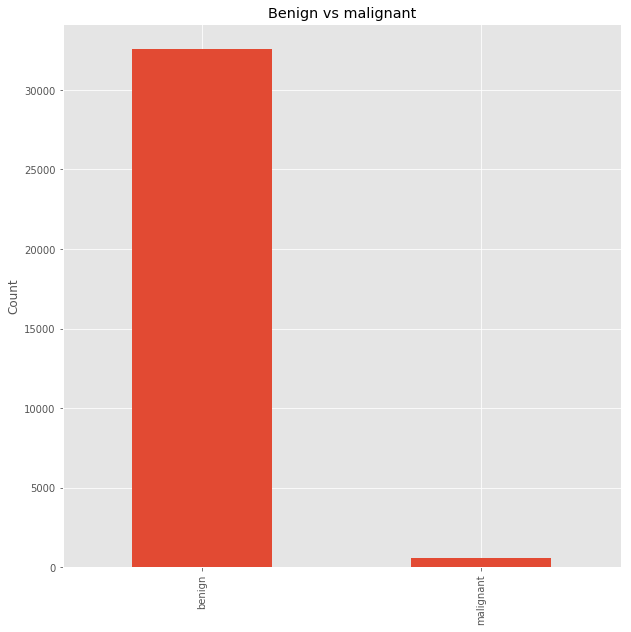

In [93]:
df['benign_malignant'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Benign vs malignant")